In [2]:
mydir.D30 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_DA/summary_stats/"
res.DA.D30 = read.csv(paste0(mydir.D30,"pool1_13_noddd_D30.DA.qtl_results_all.txt"),sep="\t")

In [3]:
head(res.DA.D30,2)
head(res.DA.D30[res.DA.D30$feature_id == 'ENSG00000166086',],2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000128607,7_129778518_G_T,1.090016e-08,-0.2782029,0.04867012,-1,7,129710350,129775560,165,165,7,129778518,T,1,0.4606061,0.533249
ENSG00000128607,7_129779264_T_C,1.090016e-08,-0.2782029,0.04867012,-1,7,129710350,129775560,165,165,7,129779264,C,1,0.4606061,0.533249


,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
7406602,ENSG00000166086,11_133982074_C_T,1.005582e-05,-0.2108651,0.04775057,-1,11,133938820,134021896,165,165,11,133982074,T,1,0.1696970,0.1712618
7406611,ENSG00000166086,11_134235220_C_G,1.731544e-04,0.1332590,0.03548586,-1,11,133938820,134021896,165,165,11,134235220,G,1,0.3333333,0.5992988


In [4]:
mydir.D52 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_DA/summary_stats/"
res.DA.D52 = read.csv(paste0(mydir.D52,"pool1_17_D52.DA.qtl_results_all.txt"),sep="\t")

In [5]:
annos_file = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
annos = read.csv(annos_file,sep="\t")
head(annos)

feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
ENSG00000000003_TSPAN6,X,99883667,99894988,TSPAN6,ENSG00000000003_TSPAN6,ENSG00000000003
ENSG00000000419_DPM1,20,49551404,49575092,DPM1,ENSG00000000419_DPM1,ENSG00000000419
ENSG00000000457_SCYL3,1,169818772,169863408,SCYL3,ENSG00000000457_SCYL3,ENSG00000000457
ENSG00000000460_C1orf112,1,169631245,169823221,C1orf112,ENSG00000000460_C1orf112,ENSG00000000460
ENSG00000001036_FUCA2,6,143815948,143832827,FUCA2,ENSG00000001036_FUCA2,ENSG00000001036
ENSG00000001084_GCLC,6,53362139,53481768,GCLC,ENSG00000001084_GCLC,ENSG00000001084


In [6]:
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_Storey.csv")
head(leads,2)

X,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


In [7]:
genes = as.character(leads[leads$label == "DA_D30","feature_id"])
genes0 = as.character(leads[leads$label == "DA_D52","feature_id"])
# genes
D52_genes = genes0[!(genes0 %in% genes)]

In [8]:
length(D52_genes)

[1] 441

In [9]:
library(ggthemes)

mypalette = "Warm and cool"
col_D30 = canva_pal(mypalette)(4)[3]
col_D52 = canva_pal(mypalette)(4)[1]

In [10]:
gene_name = 'HSPB1'

In [32]:
annos[annos$hgnc_symbol == gene_name,]
gene = as.character(annos[annos$hgnc_symbol == gene_name,"ensembl_gene_id"])
gene_start = annos[annos$hgnc_symbol == gene_name,"start"]
gene_end = annos[annos$hgnc_symbol == gene_name,"end"]

,feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
2373,ENSG00000106211_HSPB1,7,75931861,75933612,HSPB1,ENSG00000106211_HSPB1,ENSG00000106211


In [12]:
leads[leads$feature_id == gene,]

,X,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
9478,10730,7_75972947_T_C,1.696261e-08,-0.2665915,0.04726439,0.0002097575,7,75931861,75933612,175,...,7,75972947,C,1,0.4628571,1.00000000,ENSG00000106211,0.004702325,0.002766754,DA_D52
10248,5628,7_75929190_G_C,7.632241e-08,-0.3231423,0.06011264,0.0008759756,7,75931861,75933612,161,...,7,75929190,C,1,0.2795031,0.56074657,ENSG00000106211,0.013119726,0.006769855,Sert_D52
11055,495,7_75930759_C_G,1.999387e-07,-0.2469529,0.04749646,0.0013548935,7,75931861,75933612,169,...,7,75930759,G,1,0.2396450,0.08867854,ENSG00000106211,0.018330482,0.009780610,Epen1_D52
13623,62761,7_75927125_A_G,6.266507e-07,-0.2955864,0.05932115,0.0026683361,7,75931861,75933612,154,...,7,75927125,G,1,0.2694805,0.30414515,ENSG00000106211,0.040961434,0.023712190,Sert_D52_ROT


In [13]:
r1 = res.DA.D30[res.DA.D30$feature_id == gene,]
r2 = res.DA.D52[res.DA.D52$feature_id == gene,]

In [14]:
m1 = min(r1$p_value)
m2 = min(r2$p_value)
m = min(m1,m2)

In [47]:
options(repr.plot.width = 6, repr.plot.height = 3.2)

In [77]:
library(ggplot2)

In [78]:
pos1 = r1[r1$p_value == m1,"snp_position"][1]
p1 = ggplot(r1, aes(x = snp_position, y = -log10(p_value))) + geom_point(alpha = 0.5,col=col_D30) + 
    geom_point(aes(x=pos1, y = -log10(m1)),col=col_D30, size = 2, shape = 23, alpha = 1) + 
#     ggtitle(gene_name) + 
    ylim(c(-1,8)) + theme_classic()+ 
    xlab("Genomic position on chromosome 7") + ylab("-log10(P)")
# p1

In [79]:
gene_start
gene_end

[1] 75931861

[1] 75933612

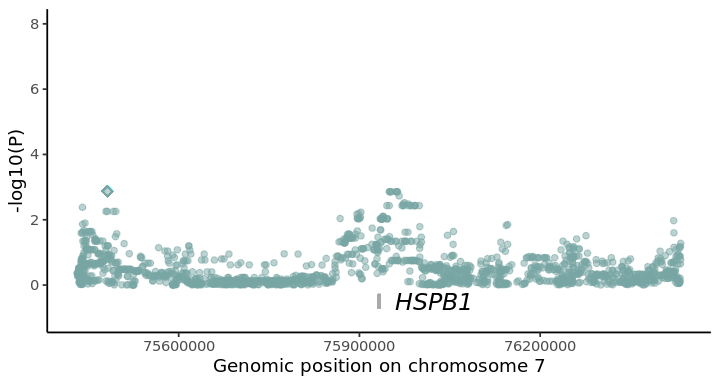

In [80]:
p = p1 
p <- p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = -0.7, ymax = -0.3), 
                  color = "darkgray", alpha = 0.2, fill = "lightgrey")
p <- p + annotate("text", x = gene_end + 0.9*10e+4, y = -0.5, label = "HSPB1", col = "black", size = 5, fontface = 'italic')
p1 = p
p1

In [81]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/main_figures/"

In [82]:
pdf(paste0(fig_dir,"Fig4b_HSPB1_D30.pdf"), width=6, height=3.2)
p1
dev.off()

png 
  2

In [83]:
pos2 = r2[r2$p_value == m2,"snp_position"][1]
p2 = ggplot(r2, aes(x = snp_position, y = -log10(p_value))) + geom_point(alpha = 0.5,col=col_D52) + 
    geom_point(aes(x=pos2, y = -log10(m2)),col=col_D52, size = 2, shape = 23, alpha = 1) + 
#     ggtitle(gene_name) + 
    ylim(c(-1,-log10(m))) + theme_classic()+ 
    xlab("Genomic position on chromosome 7") + ylab("-log10(P)")
# p2

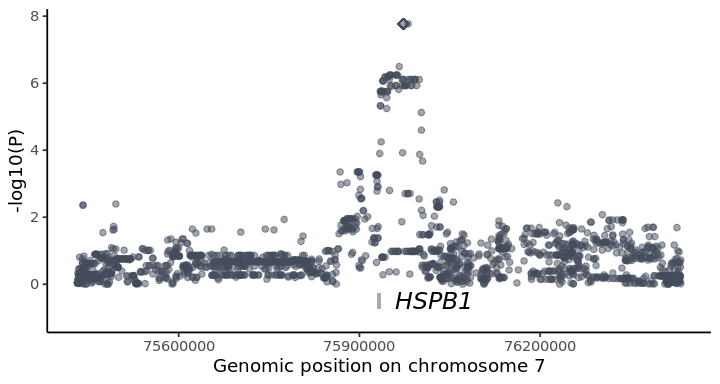

In [84]:
p = p2 
p <- p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = -0.7, ymax = -0.3), 
                  color = "darkgray", alpha = 0.2, fill = "lightgrey")
p <- p + annotate("text", x = gene_end + 0.9*10e+4, y = -0.5, label = "HSPB1", col = "black", size = 5, fontface = 'italic')
p2 = p
p2

In [85]:
pdf(paste0(fig_dir,"Fig4b_HSPB1_D52.pdf"), width=6, height=3.2)
p2
dev.off()

png 
  2